In [6]:
import pandas as pd

# Cargar el dataset (descargarlo desde Kaggle si no lo tienes)
url = 'C:/Users/Diego/Desktop/ML/data/train/diabetes.csv'

# Configuración para mostrar todas las columnas
pd.set_option('display.max_columns', None)

# Configuración para mostrar todo el contenido de las columnas
pd.set_option('display.max_colwidth', None)

# Configuración para mostrar todas las filas (si es necesario)
pd.set_option('display.max_rows', None)

df = pd.read_csv(url)

# Ver las primeras filas del dataset
df.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


In [7]:
# Cargar el archivo CSV
important_features_df = pd.read_csv('C:/Users/Diego/Desktop/ML/features/diabetes/important_features.csv')

# Crear una lista de columnas a seleccionar (importantes + 'Survived')
selected_columns = important_features_df['Feature'].tolist()  # Asegúrate de que el nombre de la columna sea correcto
selected_columns.append('Outcome')  # Agregar 'Survived'

df = df[selected_columns]

In [10]:
from sklearn.model_selection import train_test_split

# Definir variables predictoras (X) y objetivo (y)
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)

Tamaño del conjunto de entrenamiento: (559, 4)
Tamaño del conjunto de prueba: (140, 4)


In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Entrenar el modelo
tree_model = DecisionTreeClassifier(random_state=42,max_depth=4)
tree_model.fit(X_train, y_train)

# Predecir
y_pred_tree = tree_model.predict(X_test)

# Evaluar precisión
print("Precisión del Árbol de Decisión:", accuracy_score(y_test, y_pred_tree))


Precisión del Árbol de Decisión: 0.7571428571428571


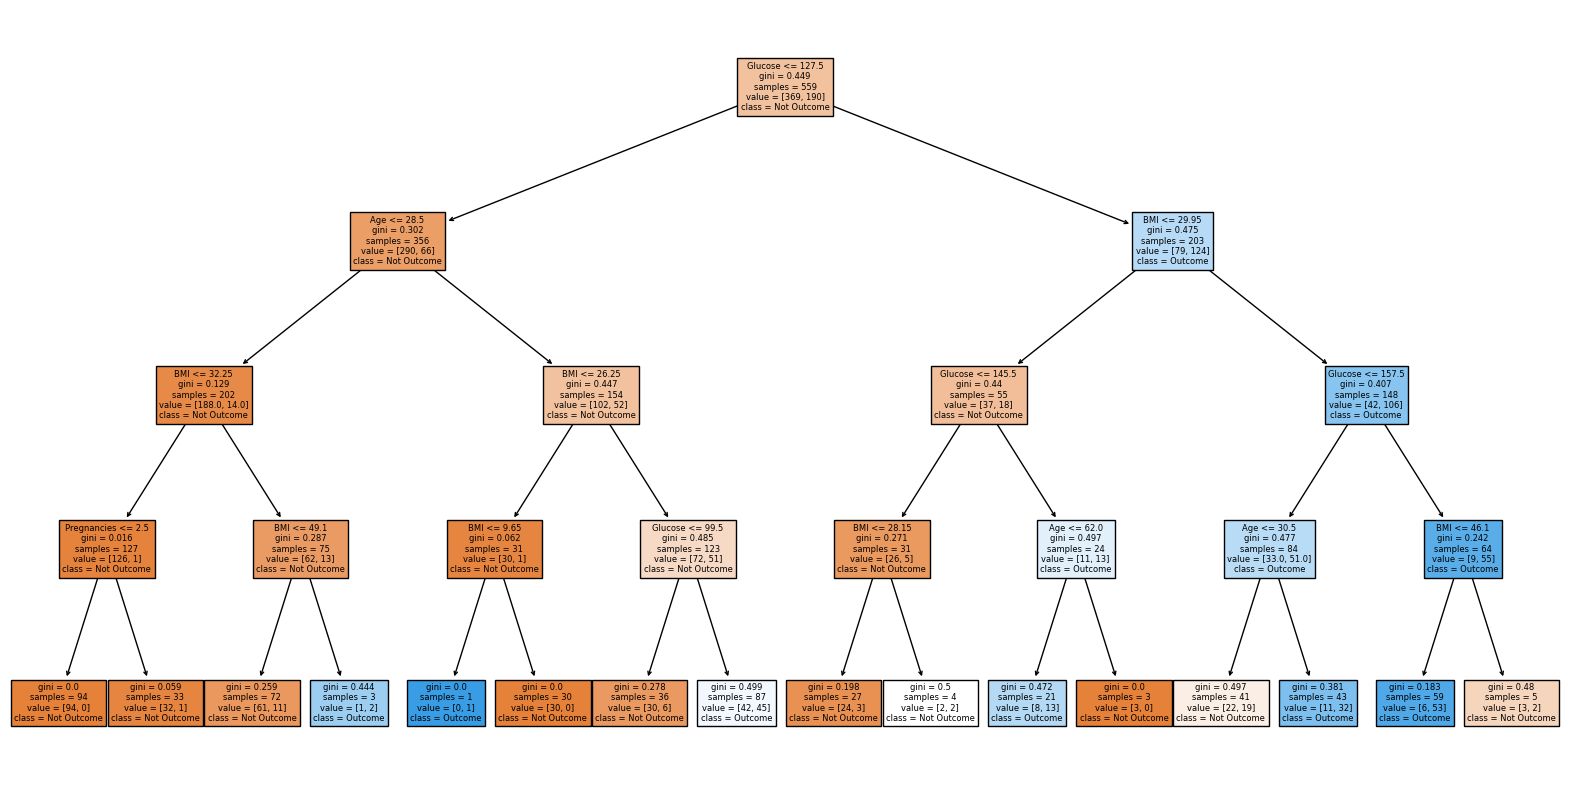

In [13]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Suponiendo que estas son las características del dataset Titanic
feature_names = X_train.columns  # Nombres de las características
class_names = ['Not Outcome', 'Outcome']  # Etiquetas para las clases

# Graficar el árbol de decisión
plt.figure(figsize=(20,10))  # Ajusta el tamaño de la figura
plot_tree(tree_model, filled=True, feature_names=feature_names, class_names=class_names)
plt.show()

In [14]:
import pandas as pd

# Cargar el archivo de prueba
test_data = pd.read_csv('C:/Users/Diego/Desktop/ML/data/test/test_diabetes.csv')

test_data.fillna(0, inplace=True)  # Llenar valores nulos con 0 o alguna estrategia que usaste

# Asegúrate de que las columnas sean las mismas que en X_train
X_test_data = test_data[feature_names]  # Seleccionar las columnas adecuadas

# Predecir la supervivencia con el modelo entrenado
y_pred_test = tree_model.predict(X_test_data)

# Agregar las predicciones al dataframe de prueba para verlo de manera clara
test_data['Outcome_Prediction'] = y_pred_test

# Mostrar los primeros resultados
print(test_data[['Outcome','Outcome_Prediction']])


    Outcome  Outcome_Prediction
0         0                   0
1         0                   0
2         1                   1
3         1                   1
4         0                   1
5         0                   0
6         0                   0
7         1                   1
8         0                   0
9         1                   1
10        1                   0
11        0                   1
12        0                   1
13        1                   1
14        0                   0
15        0                   1
16        1                   1
17        1                   1
18        0                   0
19        0                   0
20        1                   0
21        0                   0
22        0                   0
23        1                   1
24        0                   1
25        0                   1
26        0                   1
27        0                   0
28        0                   0
29        0                   1
30      

In [15]:
# Calcular la precisión si 'Survived' está presente en los datos de prueba
if 'Outcome' in test_data.columns:
    accuracy = accuracy_score(test_data['Outcome'], test_data['Outcome_Prediction'])
    print(f"Tasa de acierto (accuracy): {accuracy * 100:.2f}%")
else:
    print("La columna 'Survived' no está presente en los datos de prueba. No se puede calcular el accuracy.")

Tasa de acierto (accuracy): 73.91%


In [18]:
import joblib

# Verifica si la tasa de acierto es mayor que 0.75
if accuracy > 0.7:
    # Guardar el modelo entrenado
    joblib.dump(tree_model, 'C:/Users/Diego/Desktop/ML/models/diabetes/tree_diabetes.pkl')
    print(f"Modelo guardado exitosamente con una tasa de acierto de {accuracy * 100:.2f}%")
else:
    print(f"Tasa de acierto (accuracy): {accuracy * 100:.2f}%. Modelo no guardado.")

Modelo guardado exitosamente con una tasa de acierto de 73.91%
